In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#The  Data
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
mall = pd.read_csv('/content/Mall_Customers.csv', header=0)

In [ ]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall.shape

(200, 5)

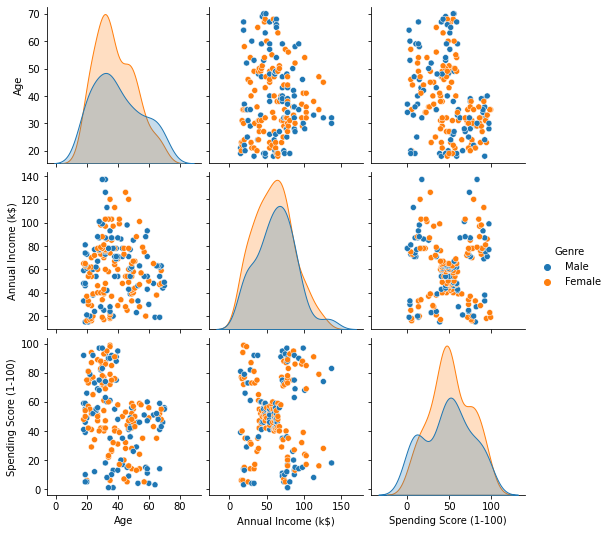

In [ ]:
sns.pairplot(mall, hue='Genre',vars=['Age','Annual Income (k$)','Spending Score (1-100)'])

##Apply Feature Scaling
Clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale. Feature scaling of the data can help produce good results.

https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/

https://machinelearningmastery.com/handle-missing-data-python/ 

In [ ]:
scaler = StandardScaler()
scale = scaler.fit_transform(mall[['Age','Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Age','Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
#Applying Kmeans with 2 Clusters (K=2)
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted[0:10,]
#sum(y_predicted)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[ 0.66486279,  0.72485456],
       [-0.94367622, -1.02882583]])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

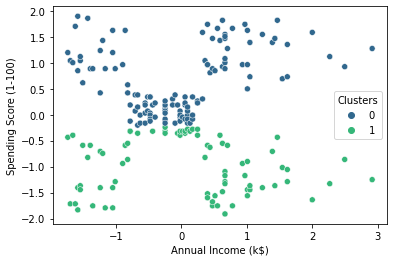

In [ ]:
df_scale['Clusters'] = km.labels_
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = 'Clusters',  data=df_scale, palette='viridis')

It is evident that there is a scope for data to be grouped into more clusters than only 2. But how to know how many clusters? 

**Elbow Method** : calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different k and choose the k for which WSS starts to diminish. 


1.   The Squared Error for a data point is the square of the distance of a point from its cluster center.
2.   The WSS score is the summation of Squared Errors for all given data points.
3.   Distance metrics like Euclidean Distance or the Manhattan Distance can be used.



In [ ]:
K=range(2,20)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

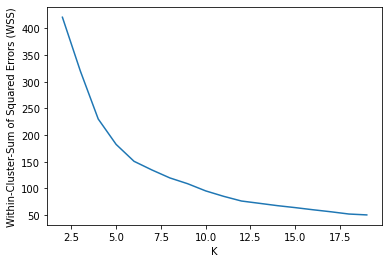

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

## The Silhouette Method
The silhouette value measures the similarity of a data point within its cluster. It has a range between +1 and -1 and the higher values denote a good clustering.



In [ ]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
  labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
  +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.33091982128321307
Silhouette score for k(clusters) = 3 is 0.3487555030695006
Silhouette score for k(clusters) = 4 is 0.3886226357205196
Silhouette score for k(clusters) = 5 is 0.41717847572310357
Silhouette score for k(clusters) = 6 is 0.4213916874460823
Silhouette score for k(clusters) = 7 is 0.4010086927487852
Silhouette score for k(clusters) = 8 is 0.38834482431204037
Silhouette score for k(clusters) = 9 is 0.39240521510191345
Silhouette score for k(clusters) = 10 is 0.3862999297728193
Silhouette score for k(clusters) = 11 is 0.38266986234835926
Silhouette score for k(clusters) = 12 is 0.3980971276929259


In [ ]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
#x="Annual Income (k$)", y="Spending Score (1-100)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

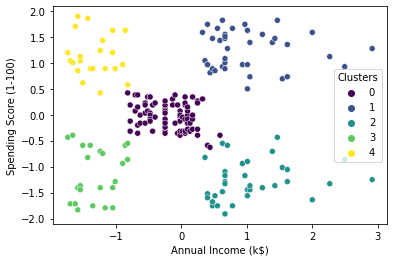

In [ ]:
df_scale['Clusters'] = kmeans.labels_
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = 'Clusters',  data=df_scale, palette='viridis')

## K means for higher dimension data
K Means Clustering with Principal Component Analysis

By applying principal component analysis (PCA) on the dataset, we can reduce its dimension to only two while still preserving the information. And then clustering can be applied to this transformed dataset and then visualized in a 2-D plot. Moreover, PCA can also help to avoid the curse of dimensionality.

https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/#:~:text=Step%2D1%3ATo%20decide%20the,new%20centroid%20for%20every%20cluster.